In [168]:
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.svm import SVR
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MinMaxScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer

import math
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#mean_squared_error(y_true, y_pred)

In [141]:
df=pd.read_csv(r"C:\Users\Deepak Tripathi\Desktop\assignment machine learning\part3\CE802_P3_Data.csv")

In [142]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,61.22,6,0.00,UK,-14.91,1030.95,614.70,-8.40,11.96,275.99,-333.60,1.86,19.48,6,Very high,7841.50,1605.31
1,86.58,12,20.07,Europe,0.57,1059.87,1354.00,-9.97,3.80,347.10,-356.04,6.39,22.15,2,Very low,25589.98,0.00
2,75.95,6,45.00,USA,-1.29,1320.03,1477.96,-10.02,20.32,345.69,-353.58,13.14,21.87,8,Low,16849.14,3241.77
3,156.57,12,12.93,USA,-4.83,1696.92,750.14,-10.98,4.78,253.37,-254.37,15.48,28.11,10,Very low,10791.06,0.00
4,101.27,3,0.51,Rest,-26.28,1451.37,251.06,-9.71,2.06,242.35,-379.77,3.90,23.84,10,Very low,14760.66,336.25


In [143]:
df.shape

(1500, 17)

In [144]:
set(df['F15'])

{'High', 'Low', 'Medium', 'Very high', 'Very low'}

In [145]:
df['F15']=df['F15'].map({'Very low':0,'Low':1,'Medium':2,'High':3,'Very high':4})
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,61.22,6,0.00,UK,-14.91,1030.95,614.70,-8.40,11.96,275.99,-333.60,1.86,19.48,6,4,7841.50,1605.31
1,86.58,12,20.07,Europe,0.57,1059.87,1354.00,-9.97,3.80,347.10,-356.04,6.39,22.15,2,0,25589.98,0.00
2,75.95,6,45.00,USA,-1.29,1320.03,1477.96,-10.02,20.32,345.69,-353.58,13.14,21.87,8,1,16849.14,3241.77
3,156.57,12,12.93,USA,-4.83,1696.92,750.14,-10.98,4.78,253.37,-254.37,15.48,28.11,10,0,10791.06,0.00
4,101.27,3,0.51,Rest,-26.28,1451.37,251.06,-9.71,2.06,242.35,-379.77,3.90,23.84,10,0,14760.66,336.25


# First create a very basic modal without doing much preprocessing and see what result are we getting

In [146]:
df1=df.drop(['Target'],axis=1)
y=df['Target']


cat=df1.dtypes==object
print(cat)
# print(~cat)

F1     False
F2     False
F3     False
F4      True
F5     False
F6     False
F7     False
F8     False
F9     False
F10    False
F11    False
F12    False
F13    False
F14    False
F15    False
F16    False
dtype: bool


In [147]:
ct = ColumnTransformer(
     [("ohe", OneHotEncoder(handle_unknown='ignore'), cat),
      ("norm", StandardScaler(), ~cat)])

#MinMaxScaler
#StandardScaler

ct.fit(df1)
x=ct.transform(df1)

In [148]:
x.shape

(1500, 19)

In [149]:
x, X_test, y, y_test = train_test_split(x, y, test_size=0.20, random_state=41)

In [150]:
algo=pd.DataFrame(columns=['RMSE','R2','Parameter'])
pred = cross_val_predict(LinearRegression(), x, y, cv=10)

MSE=mean_squared_error(y,pred)
RMSE=math.sqrt(MSE)
r2=r2_score(y,pred)
print('RMSE=',RMSE)
print('R2=',r2)
print('-'*50)

model='LinearRegression'
algo.loc[model]=[RMSE,r2,'Default']
algo

RMSE= 513.8622752143402
R2= 0.7759911413929883
--------------------------------------------------


,RMSE,R2,Parameter
LinearRegression,513.862275,0.775991,Default


In [151]:
pred = cross_val_predict(Ridge(), x, y, cv=10)
MSE=mean_squared_error(y,pred)
RMSE=math.sqrt(MSE)
r2=r2_score(y,pred)
print('RMSE=',RMSE)
print('R2=',r2)
print('-'*50)

model='Ridge'
algo.loc[model]=[RMSE,r2,'Default']
algo


RMSE= 512.7958567286271
R2= 0.7769199478766612
--------------------------------------------------


,RMSE,R2,Parameter
LinearRegression,513.862275,0.775991,Default
Ridge,512.795857,0.776920,Default


In [152]:
pred = cross_val_predict(Lasso(), x, y, cv=10)
MSE=mean_squared_error(y,pred)
RMSE=math.sqrt(MSE)
r2=r2_score(y,pred)
print('RMSE=',RMSE)
print('R2=',r2)
print('-'*50)

model='Lasso'
algo.loc[model]=[RMSE,r2,'Default']
algo

RMSE= 511.877805834089
R2= 0.7777179867630559
--------------------------------------------------


,RMSE,R2,Parameter
LinearRegression,513.862275,0.775991,Default
Ridge,512.795857,0.776920,Default
Lasso,511.877806,0.777718,Default


In [105]:
pred = cross_val_predict(SVR(), x, y, cv=10)
MSE=mean_squared_error(y,pred)
RMSE=math.sqrt(MSE)
r2=r2_score(y,pred)
print('RMSE=',RMSE)
print('R2=',r2)
print('-'*50)

model='SVR'
algo.loc[model]=[RMSE,r2,'Default']
algo

RMSE= 1176.7691285694762
R2= -0.17477380842216683
--------------------------------------------------


,RMSE,R2,Parameter
LinearRegression,513.862275,0.775991,Default
Ridge,512.795857,0.776920,Default
Lasso,511.877806,0.777718,Default
SVR,1176.769129,-0.174774,Default


In [106]:
pred = cross_val_predict(GradientBoostingRegressor(), x, y, cv=10)
MSE=mean_squared_error(y,pred)
RMSE=math.sqrt(MSE)
r2=r2_score(y,pred)
print('RMSE=',RMSE)
print('R2=',r2)
print('-'*50)

model='GradientBoostingRegressor'
algo.loc[model]=[RMSE,r2,'Default']
algo

RMSE= 483.203248813257
R2= 0.8019242023798863
--------------------------------------------------


,RMSE,R2,Parameter
LinearRegression,513.862275,0.775991,Default
Ridge,512.795857,0.776920,Default
Lasso,511.877806,0.777718,Default
SVR,1176.769129,-0.174774,Default
GradientBoostingRegressor,483.203249,0.801924,Default


In [107]:
pred = cross_val_predict(RandomForestRegressor(), x, y, cv=10)
MSE=mean_squared_error(y,pred)
RMSE=math.sqrt(MSE)
r2=r2_score(y,pred)
print('RMSE=',RMSE)
print('R2=',r2)
print('-'*50)

model='RandomForestRegressor'
algo.loc[model]=[RMSE,r2,'Default']
algo

RMSE= 615.9795363893886
R2= 0.6781123669041955
--------------------------------------------------


,RMSE,R2,Parameter
LinearRegression,513.862275,0.775991,Default
Ridge,512.795857,0.776920,Default
Lasso,511.877806,0.777718,Default
SVR,1176.769129,-0.174774,Default
GradientBoostingRegressor,483.203249,0.801924,Default
RandomForestRegressor,615.979536,0.678112,Default


# Feature Selection

# Fit model only on importent features

In [180]:
df=pd.read_csv(r"C:\Users\Deepak Tripathi\Desktop\assignment machine learning\part3\CE802_P3_Data.csv")

df['F15']=df['F15'].map({'Very low':0.0,'Low':1.0,'Medium':2.0,'High':3.0,'Very high':4.0})
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,61.22,6,0.00,UK,-14.91,1030.95,614.70,-8.40,11.96,275.99,-333.60,1.86,19.48,6,4.0,7841.50,1605.31
1,86.58,12,20.07,Europe,0.57,1059.87,1354.00,-9.97,3.80,347.10,-356.04,6.39,22.15,2,0.0,25589.98,0.00
2,75.95,6,45.00,USA,-1.29,1320.03,1477.96,-10.02,20.32,345.69,-353.58,13.14,21.87,8,1.0,16849.14,3241.77
3,156.57,12,12.93,USA,-4.83,1696.92,750.14,-10.98,4.78,253.37,-254.37,15.48,28.11,10,0.0,10791.06,0.00
4,101.27,3,0.51,Rest,-26.28,1451.37,251.06,-9.71,2.06,242.35,-379.77,3.90,23.84,10,0.0,14760.66,336.25


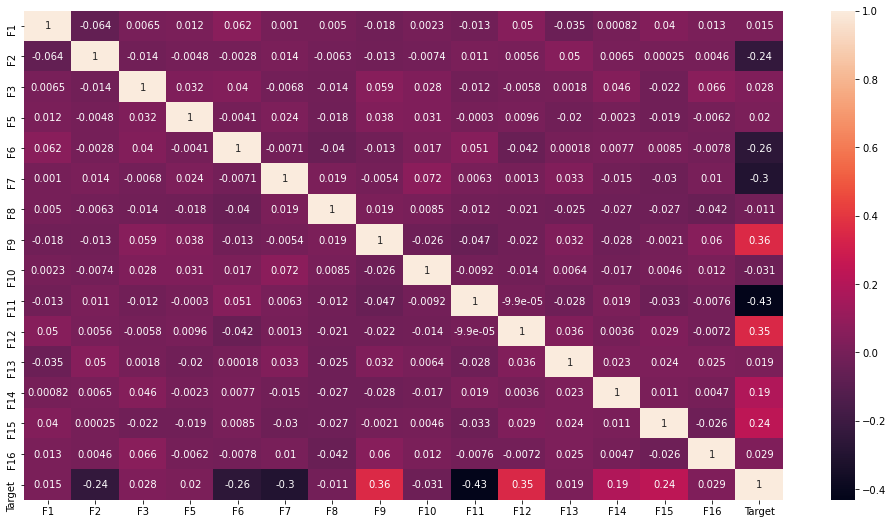

In [181]:
cor=df.corr()

plt.figure(figsize=(17,9))
sns.heatmap(cor,annot=True)

In [182]:
cor[-1:]

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
Target,0.015412,-0.2362,0.027713,0.020443,-0.263022,-0.30089,-0.01133,0.357137,-0.031407,-0.43099,0.346373,0.018677,0.193704,0.237441,0.029194,1.0


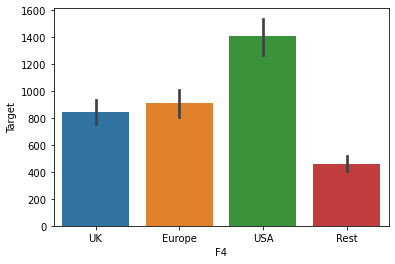

In [183]:
sns.barplot(x='F4',y='Target',data = df)

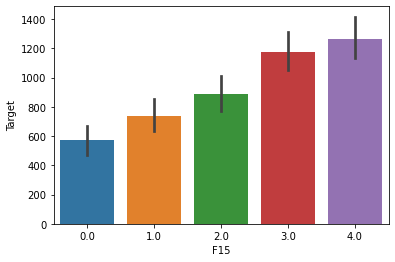

In [184]:
sns.barplot(x='F15',y='Target',data = df)

In [185]:
selected_df=df[['F2','F4','F6','F7','F9','F11','F12','F14','F15','Target']]
selected_df

,F2,F4,F6,F7,F9,F11,F12,F14,F15,Target
0,6,UK,1030.95,614.70,11.96,-333.60,1.86,6,4.0,1605.31
1,12,Europe,1059.87,1354.00,3.80,-356.04,6.39,2,0.0,0.00
2,6,USA,1320.03,1477.96,20.32,-353.58,13.14,8,1.0,3241.77
3,12,USA,1696.92,750.14,4.78,-254.37,15.48,10,0.0,0.00
4,3,Rest,1451.37,251.06,2.06,-379.77,3.90,10,0.0,336.25
...,...,...,...,...,...,...,...,...,...,...
1495,9,Rest,1534.28,957.56,2.66,-260.19,6.24,12,4.0,110.45
1496,3,Europe,1902.12,889.62,8.72,-382.59,19.98,12,4.0,2672.58
1497,3,Rest,1720.91,294.80,8.58,-469.68,6.06,16,4.0,1722.09
1498,12,Europe,1213.86,1526.42,3.60,-335.64,20.40,10,1.0,323.48


In [186]:
df1=selected_df.drop(['Target'],axis=1)
y=selected_df['Target']


cat=df1.dtypes==object
# print(cat)
# print(~cat)

In [187]:
ct = ColumnTransformer(
     [("ohe", OneHotEncoder(handle_unknown='ignore'), cat),
      ("norm", StandardScaler(), ~cat)])


ct.fit(df1)
x=ct.transform(df1)
x.shape

(1500, 12)

In [188]:
x, X_test, y, y_test = train_test_split(x, y, test_size=0.20, random_state=41)

In [189]:
algo=pd.DataFrame(columns=['RMSE','R2','Parameter'])
pred = cross_val_predict(LinearRegression(), x, y, cv=10)

MSE=mean_squared_error(y,pred)
RMSE=math.sqrt(MSE)
r2=r2_score(y,pred)
print('RMSE=',RMSE)
print('R2=',r2)
print('-'*50)

model='LinearRegression'
algo.loc[model]=[RMSE,r2,'Default']
algo


pred = cross_val_predict(Ridge(), x, y, cv=10)
MSE=mean_squared_error(y,pred)
RMSE=math.sqrt(MSE)
r2=r2_score(y,pred)
print('RMSE=',RMSE)
print('R2=',r2)
print('-'*50)

model='Ridge'
algo.loc[model]=[RMSE,r2,'Default']
algo


pred = cross_val_predict(Lasso(), x, y, cv=10)
MSE=mean_squared_error(y,pred)
RMSE=math.sqrt(MSE)
r2=r2_score(y,pred)
print('RMSE=',RMSE)
print('R2=',r2)
print('-'*50)

model='Lasso'
algo.loc[model]=[RMSE,r2,'Default']
algo



pred = cross_val_predict(SVR(), x, y, cv=10)
MSE=mean_squared_error(y,pred)
RMSE=math.sqrt(MSE)
r2=r2_score(y,pred)
print('RMSE=',RMSE)
print('R2=',r2)
print('-'*50)

model='SVR'
algo.loc[model]=[RMSE,r2,'Default']
algo


pred = cross_val_predict(GradientBoostingRegressor(), x, y, cv=10)
MSE=mean_squared_error(y,pred)
RMSE=math.sqrt(MSE)
r2=r2_score(y,pred)
print('RMSE=',RMSE)
print('R2=',r2)
print('-'*50)

model='GradientBoostingRegressor'
algo.loc[model]=[RMSE,r2,'Default']
algo


pred = cross_val_predict(RandomForestRegressor(), x, y, cv=10)
MSE=mean_squared_error(y,pred)
RMSE=math.sqrt(MSE)
r2=r2_score(y,pred)
print('RMSE=',RMSE)
print('R2=',r2)
print('-'*50)

model='RandomForestRegressor'
algo.loc[model]=[RMSE,r2,'Default']
algo

RMSE= 507.4250409474444
R2= 0.7815683767888106
--------------------------------------------------
RMSE= 506.5322497993542
R2= 0.7823363414929355
--------------------------------------------------
RMSE= 506.565916677344
R2= 0.7823074063190436
--------------------------------------------------
RMSE= 1168.6198686599744
R2= -0.15855926310134105
--------------------------------------------------
RMSE= 482.59058007441774
R2= 0.8024261771269001
--------------------------------------------------
RMSE= 561.8434506111254
R2= 0.7322050594734542
--------------------------------------------------


,RMSE,R2,Parameter
LinearRegression,507.425041,0.781568,Default
Ridge,506.532250,0.782336,Default
Lasso,506.565917,0.782307,Default
SVR,1168.619869,-0.158559,Default
GradientBoostingRegressor,482.590580,0.802426,Default
RandomForestRegressor,561.843451,0.732205,Default


# Hyperparameter Tunning

In [1255]:
param_grid = {'alpha': np.logspace(-3, 3, 13)}

clf = Ridge()
grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(x,y)

print(grid.best_score_)
print(grid.best_params_)

0.7783655173565555
{'alpha': 10.0}


In [1256]:
algo=pd.DataFrame(columns=['RMSE','R2','Parameter'])
pred = cross_val_predict(Ridge(**grid.best_params_), x, y, cv=10)

MSE=mean_squared_error(y,pred)
RMSE=math.sqrt(MSE)
r2=r2_score(y,pred)
print('RMSE=',RMSE)
print('R2=',r2)
print('-'*50)

model='Ridge'
algo.loc[model]=[RMSE,r2,grid.best_params_]
algo

RMSE= 506.6380717622033
R2= 0.782245385777401
--------------------------------------------------


,RMSE,R2,Parameter
Ridge,506.638072,0.782245,{'alpha': 10.0}


In [1257]:
param_grid = {'alpha': np.logspace(-3, 3, 13)}

clf = Lasso()
grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(x,y)

print(grid.best_score_)
print(grid.best_params_)

0.7783345240656461
{'alpha': 1.0}


In [1258]:
pred = cross_val_predict(Lasso(**grid.best_params_), x, y, cv=10)
MSE=mean_squared_error(y,pred)
RMSE=math.sqrt(MSE)
r2=r2_score(y,pred)
print('RMSE=',RMSE)
print('R2=',r2)
print('-'*50)

model='Lasso'
algo.loc[model]=[RMSE,r2,grid.best_params_]
algo

RMSE= 506.565916677344
R2= 0.7823074063190436
--------------------------------------------------


,RMSE,R2,Parameter
Ridge,506.638072,0.782245,{'alpha': 10.0}
Lasso,506.565917,0.782307,{'alpha': 1.0}


In [1259]:
param_grid={'n_estimators':[100,200,300,400,500],
            'max_features':["auto", "sqrt", "log2"],
            'max_depth':[2,4,8,10]
           }
         

clf = RandomForestRegressor()
grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(x,y)

print(grid.best_score_)
print(grid.best_params_)

0.7259587021369522
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 300}


In [1260]:
pred = cross_val_predict(RandomForestRegressor(**grid.best_params_), x, y, cv=10)
MSE=mean_squared_error(y,pred)
RMSE=math.sqrt(MSE)
r2=r2_score(y,pred)
print('RMSE=',RMSE)
print('R2=',r2)
print('-'*50)

model='RandomForestRegressor'
algo.loc[model]=[RMSE,r2,grid.best_params_]
algo

RMSE= 561.6576578326631
R2= 0.7323821413261016
--------------------------------------------------


,RMSE,R2,Parameter
Ridge,506.638072,0.782245,{'alpha': 10.0}
Lasso,506.565917,0.782307,{'alpha': 1.0}
RandomForestRegressor,561.657658,0.732382,"{'max_depth': 10, 'max_features': 'sqrt', 'n_e..."


In [1261]:
param_grid={'n_estimators':[100,200,300,400,500,600,700,800],
            'max_features':["auto", "sqrt", "log2"],
            'max_depth':[2,4,8,10]
           }
         

clf = GradientBoostingRegressor()
grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(x,y)

print(grid.best_score_)
print(grid.best_params_)

0.8529084713001488
{'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 600}


In [1262]:
pred = cross_val_predict(GradientBoostingRegressor(**grid.best_params_), x, y, cv=10)
MSE=mean_squared_error(y,pred)
RMSE=math.sqrt(MSE)
r2=r2_score(y,pred)
print('RMSE=',RMSE)
print('R2=',r2)
print('-'*50)

model='GradientBoostingRegressor'
algo.loc[model]=[RMSE,r2,grid.best_params_]
algo

RMSE= 410.44184178195997
R2= 0.8570859332127738
--------------------------------------------------


,RMSE,R2,Parameter
Ridge,506.638072,0.782245,{'alpha': 10.0}
Lasso,506.565917,0.782307,{'alpha': 1.0}
RandomForestRegressor,561.657658,0.732382,"{'max_depth': 10, 'max_features': 'sqrt', 'n_e..."
GradientBoostingRegressor,410.441842,0.857086,"{'max_depth': 4, 'max_features': 'sqrt', 'n_es..."


In [1263]:
param_grid={'kernel': ('rbf','linear','poly'),'C':[1.5,10,200],'gamma': [1e-7, 1e-4]}

clf = SVR()
grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(x,y)

print(grid.best_score_)
print(grid.best_params_)

0.7595451843120288
{'C': 200, 'gamma': 1e-07, 'kernel': 'linear'}


In [1264]:
pred = cross_val_predict(SVR(**grid.best_params_), x, y, cv=10)
MSE=mean_squared_error(y,pred)
RMSE=math.sqrt(MSE)
r2=r2_score(y,pred)
print('RMSE=',RMSE)
print('R2=',r2)
print('-'*50)

model='SVR'
algo.loc[model]=[RMSE,r2,grid.best_params_]
algo

RMSE= 525.6068523658425
R2= 0.765634457935142
--------------------------------------------------


,RMSE,R2,Parameter
Ridge,506.638072,0.782245,{'alpha': 10.0}
Lasso,506.565917,0.782307,{'alpha': 1.0}
RandomForestRegressor,561.657658,0.732382,"{'max_depth': 10, 'max_features': 'sqrt', 'n_e..."
GradientBoostingRegressor,410.441842,0.857086,"{'max_depth': 4, 'max_features': 'sqrt', 'n_es..."
SVR,525.606852,0.765634,"{'C': 200, 'gamma': 1e-07, 'kernel': 'linear'}"


# Try using deep learning model on this data

In [162]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout,BatchNormalization
from keras.optimizers import Adam,SGD
from keras.callbacks import TensorBoard,EarlyStopping

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.10, random_state=41)

#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=41)

In [164]:
X_train.shape

(1080, 12)

In [165]:
X_val.shape

(120, 12)

In [166]:
import math
from keras.initializers import RandomNormal
fan_in=X_train.shape[1]
relu_std=math.sqrt(2/fan_in)

In [167]:
import math
import numpy as np
model_mlp = Sequential()
model_mlp.add(Dense(55, input_dim=X_train.shape[1], activation='sigmoid',kernel_initializer='random_uniform'))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))
model_mlp.add(Dense(1, activation='linear'))
opt = SGD(learning_rate=0.01,momentum=0.9)
model_mlp.compile(optimizer=opt, loss='mse')
model_mlp.summary()
early_stopping_cb = EarlyStopping(patience=200,restore_best_weights=True)
run_logdir=r"C:\Users\Deepak Tripathi\Desktop\rossman\log"
history = model_mlp.fit(np.array(X_train), y_train, batch_size=len(X_train),validation_data=(X_val, y_val) ,epochs=500000, verbose=1,callbacks=[early_stopping_cb])  

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 55)                715       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 56        
Total params: 771
Trainable params: 771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500000
1/1 [==============================] - 0s 244ms/step - loss: 2035609.3750 - val_loss: 1423302.6250
Epoch 2/500000
1/1 [==============================] - 0s 60ms/step - loss: 1563228.8750 - val_loss: 743773.8750
Epoch 3/500000
1/1 [==============================] - 0s 69ms/step - loss: 852158.2500 - val_loss: 550418.0000
Epoch 4/500000
1/1 [==============================] - 0s 57ms/step - loss: 629568.8125 - val_loss: 446913.1250
Epoch 5/500000
1/1 [==============================] - 0s 48ms/step - l

Epoch 70/500000
1/1 [==============================] - 0s 40ms/step - loss: 9020.3066 - val_loss: 15762.0049
Epoch 71/500000
1/1 [==============================] - 0s 31ms/step - loss: 8971.0088 - val_loss: 15907.4561
Epoch 72/500000
1/1 [==============================] - 0s 69ms/step - loss: 8898.2256 - val_loss: 15955.2539
Epoch 73/500000
1/1 [==============================] - 0s 38ms/step - loss: 8818.8613 - val_loss: 15790.1211
Epoch 74/500000
1/1 [==============================] - 0s 48ms/step - loss: 8753.0830 - val_loss: 15660.2900
Epoch 75/500000
1/1 [==============================] - 0s 49ms/step - loss: 8717.3555 - val_loss: 15663.7002
Epoch 76/500000
1/1 [==============================] - 0s 56ms/step - loss: 8638.9014 - val_loss: 15694.2871
Epoch 77/500000
1/1 [==============================] - 0s 48ms/step - loss: 8581.5518 - val_loss: 15336.8711
Epoch 78/500000
1/1 [==============================] - 0s 40ms/step - loss: 8532.1201 - val_loss: 15131.1621
Epoch 79/500000
1/1

Epoch 145/500000
1/1 [==============================] - 0s 48ms/step - loss: 6240.9141 - val_loss: 14784.0742
Epoch 146/500000
1/1 [==============================] - 0s 32ms/step - loss: 6222.3525 - val_loss: 14743.5283
Epoch 147/500000
1/1 [==============================] - 0s 48ms/step - loss: 6208.3398 - val_loss: 14690.1592
Epoch 148/500000
1/1 [==============================] - 0s 54ms/step - loss: 6194.6333 - val_loss: 14649.7686
Epoch 149/500000
1/1 [==============================] - 0s 50ms/step - loss: 6178.5918 - val_loss: 14654.2441
Epoch 150/500000
1/1 [==============================] - 0s 56ms/step - loss: 6138.1582 - val_loss: 14671.0586
Epoch 151/500000
1/1 [==============================] - 0s 47ms/step - loss: 6126.3369 - val_loss: 14643.4570
Epoch 152/500000
1/1 [==============================] - 0s 62ms/step - loss: 6109.6445 - val_loss: 14561.1211
Epoch 153/500000
1/1 [==============================] - 0s 42ms/step - loss: 6092.1279 - val_loss: 14457.6396
Epoch 154/

1/1 [==============================] - 0s 48ms/step - loss: 5206.3882 - val_loss: 13965.2207
Epoch 294/500000
1/1 [==============================] - 0s 48ms/step - loss: 5204.7681 - val_loss: 13970.8330
Epoch 295/500000
1/1 [==============================] - 0s 48ms/step - loss: 5202.6743 - val_loss: 13977.0146
Epoch 296/500000
1/1 [==============================] - 0s 48ms/step - loss: 5200.8403 - val_loss: 13990.6504
Epoch 297/500000
1/1 [==============================] - 0s 46ms/step - loss: 5198.6172 - val_loss: 14006.3652
Epoch 298/500000
1/1 [==============================] - 0s 51ms/step - loss: 5196.4053 - val_loss: 14015.2568
Epoch 299/500000
1/1 [==============================] - 0s 48ms/step - loss: 5194.2295 - val_loss: 14017.1895
Epoch 300/500000
1/1 [==============================] - 0s 32ms/step - loss: 5191.6895 - val_loss: 14018.8643
Epoch 301/500000
1/1 [==============================] - 0s 42ms/step - loss: 5189.3047 - val_loss: 14025.5342
Epoch 302/500000
1/1 [=====

In [1271]:
pred = model_mlp.predict(X_val)
MSE=mean_squared_error(y_val,pred)
RMSE=math.sqrt(MSE)
r2=r2_score(y_val,pred)
print('RMSE=',RMSE)
print('R2=',r2)
print('-'*50)

model='MLP'
algo.loc[model]=[RMSE,r2,{'No of Nuerons':40,'acivation':['sigmoid','linear']}]
algo

RMSE= 111.78662428383754
R2= 0.9883113680708007
--------------------------------------------------


,RMSE,R2,Parameter
Ridge,506.638072,0.782245,{'alpha': 10.0}
Lasso,506.565917,0.782307,{'alpha': 1.0}
RandomForestRegressor,561.657658,0.732382,"{'max_depth': 10, 'max_features': 'sqrt', 'n_e..."
GradientBoostingRegressor,410.441842,0.857086,"{'max_depth': 4, 'max_features': 'sqrt', 'n_es..."
SVR,525.606852,0.765634,"{'C': 200, 'gamma': 1e-07, 'kernel': 'linear'}"
MLP,111.786624,0.988311,"{'No of Nuerons': 40, 'acivation': ['sigmoid',..."


# MLP is giving extremely good result on valdation datset. Lets check its performence on Test datset as well, which we have not used so far

In [1272]:
test_pred=model_mlp(X_test)

In [1273]:
MSE=mean_squared_error(y_test,test_pred)
RMSE=math.sqrt(MSE)
r2=r2_score(y_test,test_pred)
print('RMSE=',RMSE)
print('R2=',r2)
print('-'*50)

model='MLP'
algo.loc[model]=[RMSE,r2,{'No of Nuerons':40,'acivation':['sigmoid','linear']}]
algo

RMSE= 120.98627755732583
R2= 0.9882578997916465
--------------------------------------------------


,RMSE,R2,Parameter
Ridge,506.638072,0.782245,{'alpha': 10.0}
Lasso,506.565917,0.782307,{'alpha': 1.0}
RandomForestRegressor,561.657658,0.732382,"{'max_depth': 10, 'max_features': 'sqrt', 'n_e..."
GradientBoostingRegressor,410.441842,0.857086,"{'max_depth': 4, 'max_features': 'sqrt', 'n_es..."
SVR,525.606852,0.765634,"{'C': 200, 'gamma': 1e-07, 'kernel': 'linear'}"
MLP,120.986278,0.988258,"{'No of Nuerons': 40, 'acivation': ['sigmoid',..."


# So MLP is giving good result on Test Dataset as well

# Try using Relu activation function in first layer and see we can improve the performence even further

In [710]:
import math
import numpy as np
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=relu_std, seed=None)))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))
#model.add(Dense(1, activation='linear'))
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt, loss='mse')
model.summary()
early_stopping_cb = EarlyStopping(patience=100,restore_best_weights=True)
run_logdir=r"C:\Users\Deepak Tripathi\Desktop\rossman\log"
history = model.fit(np.array(X_train), y_train, batch_size=len(X_train),validation_data=(X_val, y_val) ,epochs=500000, verbose=1,callbacks=[early_stopping_cb])  

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 1)                 13        
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500000
1/1 [==============================] - 0s 223ms/step - loss: 2101190.0000 - val_loss: 1870551.5000
Epoch 2/500000
1/1 [==============================] - 0s 50ms/step - loss: 2065878.7500 - val_loss: 1767503.7500
Epoch 3/500000
1/1 [==============================] - 0s 56ms/step - loss: 1955502.6250 - val_loss: 1610195.5000
Epoch 4/500000
1/1 [==============================] - 0s 59ms/step - loss: 1786383.1250 - val_loss: 1417160.8750
Epoch 5/500000
1/1 [==============================] - 0s 41ms/step - loss: 1577900.1250 - val_loss: 1207098.2500
Epoch 6/500000
1/1 [==============================] - 0s 35ms/step - loss: 1349656.87

1/1 [==============================] - 0s 32ms/step - loss: 91927.8438 - val_loss: 105524.3203
Epoch 143/500000
1/1 [==============================] - 0s 40ms/step - loss: 91908.4375 - val_loss: 105508.6016
Epoch 144/500000
1/1 [==============================] - 0s 32ms/step - loss: 91889.5391 - val_loss: 105490.6953
Epoch 145/500000
1/1 [==============================] - 0s 40ms/step - loss: 91871.1719 - val_loss: 105473.6719
Epoch 146/500000
1/1 [==============================] - 0s 40ms/step - loss: 91853.3359 - val_loss: 105457.4453
Epoch 147/500000
1/1 [==============================] - 0s 40ms/step - loss: 91836.0469 - val_loss: 105441.9609
Epoch 148/500000
1/1 [==============================] - 0s 32ms/step - loss: 91819.2656 - val_loss: 105426.8359
Epoch 149/500000
1/1 [==============================] - 0s 40ms/step - loss: 91803.0312 - val_loss: 105409.8828
Epoch 150/500000
1/1 [==============================] - 0s 40ms/step - loss: 91787.3047 - val_loss: 105393.6250
Epoch 151

1/1 [==============================] - 0s 48ms/step - loss: 91238.8203 - val_loss: 104406.5625
Epoch 289/500000
1/1 [==============================] - 0s 40ms/step - loss: 91238.6016 - val_loss: 104405.4922
Epoch 290/500000
1/1 [==============================] - ETA: 0s - loss: 91238.398 - 0s 32ms/step - loss: 91238.3984 - val_loss: 104404.4297
Epoch 291/500000
1/1 [==============================] - 0s 42ms/step - loss: 91238.2031 - val_loss: 104403.3750
Epoch 292/500000
1/1 [==============================] - 0s 37ms/step - loss: 91238.0078 - val_loss: 104402.3438
Epoch 293/500000
1/1 [==============================] - 0s 40ms/step - loss: 91237.8203 - val_loss: 104401.3281
Epoch 294/500000
1/1 [==============================] - 0s 40ms/step - loss: 91237.6562 - val_loss: 104400.3203
Epoch 295/500000
1/1 [==============================] - 0s 48ms/step - loss: 91237.4766 - val_loss: 104399.3281
Epoch 296/500000
1/1 [==============================] - 0s 40ms/step - loss: 91237.3359 - val

Epoch 361/500000
1/1 [==============================] - 0s 33ms/step - loss: 91233.8438 - val_loss: 104363.5234
Epoch 362/500000
1/1 [==============================] - 0s 40ms/step - loss: 91233.8281 - val_loss: 104363.3125
Epoch 363/500000
1/1 [==============================] - 0s 40ms/step - loss: 91233.8203 - val_loss: 104363.1016
Epoch 364/500000
1/1 [==============================] - 0s 32ms/step - loss: 91233.8125 - val_loss: 104362.8984
Epoch 365/500000
1/1 [==============================] - 0s 40ms/step - loss: 91233.8047 - val_loss: 104362.6875
Epoch 366/500000
1/1 [==============================] - 0s 40ms/step - loss: 91233.7891 - val_loss: 104362.4922
Epoch 367/500000
1/1 [==============================] - 0s 32ms/step - loss: 91233.7891 - val_loss: 104362.2969
Epoch 368/500000
1/1 [==============================] - 0s 32ms/step - loss: 91233.7656 - val_loss: 104362.1016
Epoch 369/500000
1/1 [==============================] - 0s 40ms/step - loss: 91233.7812 - val_loss: 1043

1/1 [==============================] - 0s 40ms/step - loss: 91233.6094 - val_loss: 104355.4141
Epoch 435/500000
1/1 [==============================] - 0s 40ms/step - loss: 91233.6094 - val_loss: 104355.3750
Epoch 436/500000
1/1 [==============================] - 0s 40ms/step - loss: 91233.6172 - val_loss: 104355.3516
Epoch 437/500000
1/1 [==============================] - 0s 32ms/step - loss: 91233.6172 - val_loss: 104355.2969
Epoch 438/500000
1/1 [==============================] - 0s 40ms/step - loss: 91233.6172 - val_loss: 104355.2500
Epoch 439/500000
1/1 [==============================] - 0s 48ms/step - loss: 91233.6094 - val_loss: 104355.2109
Epoch 440/500000
1/1 [==============================] - 0s 40ms/step - loss: 91233.6172 - val_loss: 104355.1641
Epoch 441/500000
1/1 [==============================] - 0s 40ms/step - loss: 91233.6094 - val_loss: 104355.1094
Epoch 442/500000
1/1 [==============================] - 0s 32ms/step - loss: 91233.6094 - val_loss: 104355.0859
Epoch 443

1/1 [==============================] - 0s 40ms/step - loss: 91233.6094 - val_loss: 104353.3984
Epoch 581/500000
1/1 [==============================] - 0s 32ms/step - loss: 91233.6016 - val_loss: 104353.3984
Epoch 582/500000
1/1 [==============================] - 0s 32ms/step - loss: 91233.6094 - val_loss: 104353.3750
Epoch 583/500000
1/1 [==============================] - 0s 40ms/step - loss: 91233.6094 - val_loss: 104353.3750
Epoch 584/500000
1/1 [==============================] - 0s 40ms/step - loss: 91233.6016 - val_loss: 104353.3828
Epoch 585/500000
1/1 [==============================] - 0s 40ms/step - loss: 91233.6016 - val_loss: 104353.3750
Epoch 586/500000
1/1 [==============================] - 0s 40ms/step - loss: 91233.6094 - val_loss: 104353.3750
Epoch 587/500000
1/1 [==============================] - 0s 32ms/step - loss: 91233.6094 - val_loss: 104353.3750
Epoch 588/500000
1/1 [==============================] - 0s 32ms/step - loss: 91233.6094 - val_loss: 104353.3672
Epoch 589

1/1 [==============================] - 0s 32ms/step - loss: 91233.6172 - val_loss: 104353.2891
Epoch 727/500000
1/1 [==============================] - 0s 40ms/step - loss: 91233.6172 - val_loss: 104353.2891
Epoch 728/500000
1/1 [==============================] - 0s 32ms/step - loss: 91233.6094 - val_loss: 104353.2891
Epoch 729/500000
1/1 [==============================] - 0s 40ms/step - loss: 91233.6094 - val_loss: 104353.2891
Epoch 730/500000
1/1 [==============================] - 0s 40ms/step - loss: 91233.6172 - val_loss: 104353.2891
Epoch 731/500000
1/1 [==============================] - 0s 40ms/step - loss: 91233.6172 - val_loss: 104353.2891
Epoch 732/500000
1/1 [==============================] - 0s 40ms/step - loss: 91233.6094 - val_loss: 104353.2891
Epoch 733/500000
1/1 [==============================] - 0s 41ms/step - loss: 91233.6016 - val_loss: 104353.2891
Epoch 734/500000
1/1 [==============================] - 0s 32ms/step - loss: 91233.6094 - val_loss: 104353.2891
Epoch 735

In [667]:
pred = model.predict(X_val)
MSE=mean_squared_error(y_val,pred)
r2=r2_score(y_val,pred)
print('MSE=',MSE)
print('R2=',r2)
print('-'*50)

MSE= 104353.28429197156
R2= 0.9089319566401841
--------------------------------------------------


# performence has decreased with Relu

# so best model for regression is MLP with 55 nuerons in first layer with sigmoid activation 

# Classfication for Claim or No claim

# create a model to classify if a person should be given insurence

In [1274]:
df=pd.read_csv(r"C:\Users\Deepak Tripathi\Desktop\assignment machine learning\part3\CE802_P3_Data.csv")


df['F15']=df['F15'].map({'Very low':0.0,'Low':1.0,'Medium':2.0,'High':3.0,'Very high':4.0})

selected_df=df[['F2','F4','F6','F7','F9','F11','F12','F14','F15','Target']]

df=selected_df.drop(['Target'],axis=1)
y=selected_df['Target']


cat=df.dtypes==object

In [1275]:
ct = ColumnTransformer(
     [("ohe", OneHotEncoder(handle_unknown='ignore'), cat),
      ("norm", StandardScaler(), ~cat)])

ct.fit(df)
x=ct.transform(df)

In [1276]:
x.shape

(1500, 12)

In [1277]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.metrics import f1_score

In [1278]:
x, X_test, y, y_test = train_test_split(x, y, test_size=0.20, random_state=41)

# create a new target for classification. This target will be false if claim value is equal to 0 otherwise True

In [1279]:
y_c=y!=0
y_test_c=y_test!=0

In [1280]:
scores = cross_val_score(DecisionTreeClassifier(), x, y_c, cv=10,scoring='f1') # df1 dataset contains standard scaled features
print('DecisionTreeClassifier=', np.mean(scores))

scores = cross_val_score(LogisticRegression(), x, y_c, cv=10, scoring='f1')
print('LogisticRegression=',np.mean(scores))

scores = cross_val_score(GradientBoostingClassifier(), x, y_c, cv=10, scoring='f1')
print('GradientBoostingClassifier=',np.mean(scores))

DecisionTreeClassifier= 0.8479769971864618
LogisticRegression= 0.9922575780448272
GradientBoostingClassifier= 0.9279454246144377


# use logistic regression to predict if a person will claim or not

In [1281]:
logistic=LogisticRegression()
logistic.fit(x,y_c)


LogisticRegression()

# Now again train MLP on same data in which logistic regression has been trained

In [1282]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.10, random_state=41)

In [1289]:
import math
import numpy as np
model_mlp = Sequential()
model_mlp.add(Dense(55, input_dim=X_train.shape[1], activation='sigmoid',kernel_initializer='random_uniform'))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))
model_mlp.add(Dense(1, activation='linear'))
opt = SGD(learning_rate=0.01,momentum=0.9)
model_mlp.compile(optimizer=opt, loss='mse')
model_mlp.summary()
early_stopping_cb = EarlyStopping(patience=300,restore_best_weights=True)
run_logdir=r"C:\Users\Deepak Tripathi\Desktop\rossman\log"
history = model_mlp.fit(np.array(X_train), y_train, batch_size=len(X_train),validation_data=(X_val, y_val) ,epochs=500000, verbose=1,callbacks=[early_stopping_cb])  

Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_148 (Dense)            (None, 55)                715       
_________________________________________________________________
dense_149 (Dense)            (None, 1)                 56        
Total params: 771
Trainable params: 771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500000
1/1 [==============================] - 0s 120ms/step - loss: 2037210.5000 - val_loss: 1468720.5000
Epoch 2/500000
1/1 [==============================] - 0s 33ms/step - loss: 1612183.7500 - val_loss: 744681.3750
Epoch 3/500000
1/1 [==============================] - 0s 24ms/step - loss: 854368.5625 - val_loss: 520993.1875
Epoch 4/500000
1/1 [==============================] - 0s 19ms/step - loss: 607519.1875 - val_loss: 453741.8125
Epoch 5/500000
1/1 [==============================] - 0s 19ms/step - 

Epoch 144/500000
1/1 [==============================] - 0s 20ms/step - loss: 6372.7832 - val_loss: 18339.0000
Epoch 145/500000
1/1 [==============================] - 0s 20ms/step - loss: 6364.4751 - val_loss: 18386.8984
Epoch 146/500000
1/1 [==============================] - 0s 21ms/step - loss: 6357.3979 - val_loss: 18421.8848
Epoch 147/500000
1/1 [==============================] - 0s 20ms/step - loss: 6344.1870 - val_loss: 18418.6582
Epoch 148/500000
1/1 [==============================] - 0s 25ms/step - loss: 6326.2451 - val_loss: 18379.1992
Epoch 149/500000
1/1 [==============================] - 0s 22ms/step - loss: 6310.0137 - val_loss: 18314.9043
Epoch 150/500000
1/1 [==============================] - 0s 17ms/step - loss: 6300.6094 - val_loss: 18245.8066
Epoch 151/500000
1/1 [==============================] - 0s 18ms/step - loss: 6292.8394 - val_loss: 18208.8457
Epoch 152/500000
1/1 [==============================] - 0s 18ms/step - loss: 6282.3428 - val_loss: 18252.6211
Epoch 153/

1/1 [==============================] - 0s 17ms/step - loss: 5338.5444 - val_loss: 14599.3711
Epoch 293/500000
1/1 [==============================] - 0s 22ms/step - loss: 5335.9585 - val_loss: 14578.3496
Epoch 294/500000
1/1 [==============================] - 0s 23ms/step - loss: 5332.4580 - val_loss: 14560.7373
Epoch 295/500000
1/1 [==============================] - 0s 23ms/step - loss: 5328.3052 - val_loss: 14543.8809
Epoch 296/500000
1/1 [==============================] - 0s 22ms/step - loss: 5324.7061 - val_loss: 14526.6104
Epoch 297/500000
1/1 [==============================] - 0s 24ms/step - loss: 5322.2241 - val_loss: 14506.8604
Epoch 298/500000
1/1 [==============================] - 0s 22ms/step - loss: 5320.7100 - val_loss: 14480.8213
Epoch 299/500000
1/1 [==============================] - 0s 20ms/step - loss: 5319.1489 - val_loss: 14447.4336
Epoch 300/500000
1/1 [==============================] - 0s 19ms/step - loss: 5317.1387 - val_loss: 14410.9355
Epoch 301/500000
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 4993.1094 - val_loss: 14043.6914
Epoch 441/500000
1/1 [==============================] - 0s 18ms/step - loss: 4990.1055 - val_loss: 14045.8066
Epoch 442/500000
1/1 [==============================] - 0s 19ms/step - loss: 4983.2314 - val_loss: 14048.8760
Epoch 443/500000
1/1 [==============================] - 0s 19ms/step - loss: 4975.5547 - val_loss: 14053.8350
Epoch 444/500000
1/1 [==============================] - 0s 18ms/step - loss: 4974.5918 - val_loss: 14060.0225
Epoch 445/500000
1/1 [==============================] - 0s 18ms/step - loss: 4974.9224 - val_loss: 14065.7607
Epoch 446/500000
1/1 [==============================] - 0s 18ms/step - loss: 4974.5298 - val_loss: 14069.5771
Epoch 447/500000
1/1 [==============================] - 0s 19ms/step - loss: 4973.2490 - val_loss: 14071.1650
Epoch 448/500000
1/1 [==============================] - 0s 18ms/step - loss: 4971.6045 - val_loss: 14071.4668
Epoch 449/500000
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 4886.6221 - val_loss: 14339.9102
Epoch 589/500000
1/1 [==============================] - 0s 18ms/step - loss: 4886.2056 - val_loss: 14341.7314
Epoch 590/500000
1/1 [==============================] - 0s 19ms/step - loss: 4885.8350 - val_loss: 14345.8965
Epoch 591/500000
1/1 [==============================] - 0s 18ms/step - loss: 4885.4976 - val_loss: 14351.2627
Epoch 592/500000
1/1 [==============================] - 0s 20ms/step - loss: 4885.1782 - val_loss: 14356.7354
Epoch 593/500000
1/1 [==============================] - 0s 18ms/step - loss: 4884.8623 - val_loss: 14361.3369
Epoch 594/500000
1/1 [==============================] - 0s 18ms/step - loss: 4884.5439 - val_loss: 14364.4355
Epoch 595/500000
1/1 [==============================] - 0s 20ms/step - loss: 4884.2251 - val_loss: 14365.7998
Epoch 596/500000
1/1 [==============================] - 0s 18ms/step - loss: 4883.9175 - val_loss: 14365.6523
Epoch 597/500000
1/1 [=====

In [1297]:
mlp_pred = model_mlp.predict(X_test)
MSE=mean_squared_error(y_test,mlp_pred)
RMSE=math.sqrt(MSE)
r2=r2_score(y_test,mlp_pred)
print('MSE=',MSE)
print('R2=',r2)
print('-'*50)

model='MLP'
algo.loc[model]=[RMSE,r2,{'No of Nuerons':55,'acivation':['sigmoid','linear']}]
algo

MSE= 18621.85790795697
R2= 0.9850618587628973
--------------------------------------------------


,RMSE,R2,Parameter
Ridge,506.638072,0.782245,{'alpha': 10.0}
Lasso,506.565917,0.782307,{'alpha': 1.0}
RandomForestRegressor,561.657658,0.732382,"{'max_depth': 10, 'max_features': 'sqrt', 'n_e..."
GradientBoostingRegressor,410.441842,0.857086,"{'max_depth': 4, 'max_features': 'sqrt', 'n_es..."
SVR,525.606852,0.765634,"{'C': 200, 'gamma': 1e-07, 'kernel': 'linear'}"
MLP,136.461928,0.985062,"{'No of Nuerons': 55, 'acivation': ['sigmoid',..."
Logistic_and_MLP,136.461928,0.985062,"{'No of Nuerons': 55, 'acivation': ['sigmoid',..."


# Now on test split, use logistic regression first to classify if a person will claim or not.  if he claims, only then predict how much will he claim.

# Check if performence improves

In [1298]:
logistic_pred=logistic.predict(X_test)

In [1299]:
mlp_pred = model_mlp.predict(X_test)

make value equal to 0 where a person will not claim according to logisitc regression

In [1300]:
mlp_pred[logistic_pred==False]=0.0

In [1301]:
MSE=mean_squared_error(y_test,mlp_pred)
RMSE=math.sqrt(MSE)
r2=r2_score(y_test,mlp_pred)
print('MSE=',MSE)
print('R2=',r2)
print('-'*50)

model='Logistic_and_MLP'
algo.loc[model]=[RMSE,r2,{'No of Nuerons':55,'acivation':['sigmoid','linear']}]
algo

MSE= 17911.996944755516
R2= 0.9856312972893548
--------------------------------------------------


,RMSE,R2,Parameter
Ridge,506.638072,0.782245,{'alpha': 10.0}
Lasso,506.565917,0.782307,{'alpha': 1.0}
RandomForestRegressor,561.657658,0.732382,"{'max_depth': 10, 'max_features': 'sqrt', 'n_e..."
GradientBoostingRegressor,410.441842,0.857086,"{'max_depth': 4, 'max_features': 'sqrt', 'n_es..."
SVR,525.606852,0.765634,"{'C': 200, 'gamma': 1e-07, 'kernel': 'linear'}"
MLP,136.461928,0.985062,"{'No of Nuerons': 55, 'acivation': ['sigmoid',..."
Logistic_and_MLP,133.835709,0.985631,"{'No of Nuerons': 55, 'acivation': ['sigmoid',..."


# So our Final Modal is Logistic+MLP

# Lets again train these 2 modals on whole train data then use the final modal for predicting test split created above

In [1225]:
df=pd.read_csv(r"C:\Users\Deepak Tripathi\Desktop\assignment machine learning\part3\CE802_P3_Data.csv")

df['F15']=df['F15'].map({'Very low':0.0,'Low':1.0,'Medium':2.0,'High':3.0,'Very high':4.0})

df=df[['F2','F4','F6','F7','F9','F11','F12','F14','F15','Target']]

df1=df.drop(['Target'],axis=1)
y=df['Target']


cat=df1.dtypes==object

ct = ColumnTransformer(
     [("ohe", OneHotEncoder(handle_unknown='ignore'), cat),
      ("norm", StandardScaler(), ~cat)])

ct.fit(df1)

x=ct.transform(df1)
y_c=y!=0

x.shape

(1500, 12)

In [1226]:
clf_c=LogisticRegression()
clf_c.fit(x,y_c)

LogisticRegression()

In [1234]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.10, random_state=41)

import math
import numpy as np
model_mlp = Sequential()
model_mlp.add(Dense(55, input_dim=X_train.shape[1], activation='sigmoid',kernel_initializer='random_uniform'))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))
model_mlp.add(Dense(1, activation='linear'))
opt = SGD(learning_rate=0.01,momentum=0.9)
model_mlp.compile(optimizer=opt, loss='mse')
model_mlp.summary()
early_stopping_cb = EarlyStopping(patience=300,restore_best_weights=True)
run_logdir=r"C:\Users\Deepak Tripathi\Desktop\rossman\log"
history = model_mlp.fit(np.array(X_train), y_train, batch_size=len(X_train),validation_data=(X_val, y_val) ,epochs=500000, verbose=1,callbacks=[early_stopping_cb])  

Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_140 (Dense)            (None, 55)                715       
_________________________________________________________________
dense_141 (Dense)            (None, 1)                 56        
Total params: 771
Trainable params: 771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500000
1/1 [==============================] - 0s 100ms/step - loss: 2057156.1250 - val_loss: 1515982.6250
Epoch 2/500000
1/1 [==============================] - 0s 19ms/step - loss: 1618186.6250 - val_loss: 843844.1875
Epoch 3/500000
1/1 [==============================] - 0s 22ms/step - loss: 826781.8750 - val_loss: 602670.5000
Epoch 4/500000
1/1 [==============================] - 0s 20ms/step - loss: 542441.6875 - val_loss: 523019.9375
Epoch 5/500000
1/1 [==============================] - 0s 24ms/step - 

1/1 [==============================] - 0s 19ms/step - loss: 4682.9775 - val_loss: 11913.6426
Epoch 144/500000
1/1 [==============================] - 0s 18ms/step - loss: 4672.8438 - val_loss: 11890.2812
Epoch 145/500000
1/1 [==============================] - 0s 17ms/step - loss: 4663.0215 - val_loss: 11862.6387
Epoch 146/500000
1/1 [==============================] - 0s 18ms/step - loss: 4653.8413 - val_loss: 11832.6562
Epoch 147/500000
1/1 [==============================] - 0s 17ms/step - loss: 4646.0889 - val_loss: 11800.7422
Epoch 148/500000
1/1 [==============================] - 0s 20ms/step - loss: 4639.1406 - val_loss: 11765.8184
Epoch 149/500000
1/1 [==============================] - 0s 19ms/step - loss: 4632.4902 - val_loss: 11727.1289
Epoch 150/500000
1/1 [==============================] - 0s 20ms/step - loss: 4625.2969 - val_loss: 11686.7529
Epoch 151/500000
1/1 [==============================] - 0s 19ms/step - loss: 4617.2061 - val_loss: 11648.3203
Epoch 152/500000
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 3758.7434 - val_loss: 10238.4502
Epoch 292/500000
1/1 [==============================] - 0s 19ms/step - loss: 3754.7205 - val_loss: 10233.6699
Epoch 293/500000
1/1 [==============================] - 0s 21ms/step - loss: 3751.7412 - val_loss: 10229.4854
Epoch 294/500000
1/1 [==============================] - 0s 19ms/step - loss: 3749.2593 - val_loss: 10225.8535
Epoch 295/500000
1/1 [==============================] - 0s 18ms/step - loss: 3746.8662 - val_loss: 10222.7432
Epoch 296/500000
1/1 [==============================] - 0s 19ms/step - loss: 3744.3354 - val_loss: 10220.1699
Epoch 297/500000
1/1 [==============================] - 0s 20ms/step - loss: 3741.6370 - val_loss: 10218.1084
Epoch 298/500000
1/1 [==============================] - 0s 20ms/step - loss: 3738.8389 - val_loss: 10216.4971
Epoch 299/500000
1/1 [==============================] - 0s 19ms/step - loss: 3735.9656 - val_loss: 10215.3506
Epoch 300/500000
1/1 [=====

1/1 [==============================] - 0s 19ms/step - loss: 3371.5745 - val_loss: 10095.8311
Epoch 440/500000
1/1 [==============================] - 0s 19ms/step - loss: 3369.5251 - val_loss: 10105.7344
Epoch 441/500000
1/1 [==============================] - 0s 18ms/step - loss: 3368.2227 - val_loss: 10120.8672
Epoch 442/500000
1/1 [==============================] - 0s 19ms/step - loss: 3366.3669 - val_loss: 10136.8779
Epoch 443/500000
1/1 [==============================] - 0s 18ms/step - loss: 3363.8691 - val_loss: 10145.9141
Epoch 444/500000
1/1 [==============================] - 0s 19ms/step - loss: 3361.1555 - val_loss: 10144.9062
Epoch 445/500000
1/1 [==============================] - 0s 20ms/step - loss: 3358.5056 - val_loss: 10138.8916
Epoch 446/500000
1/1 [==============================] - 0s 17ms/step - loss: 3356.5552 - val_loss: 10136.5957
Epoch 447/500000
1/1 [==============================] - 0s 18ms/step - loss: 3355.1992 - val_loss: 10142.2725
Epoch 448/500000
1/1 [=====

1/1 [==============================] - 0s 22ms/step - loss: 3158.6345 - val_loss: 9966.2314
Epoch 589/500000
1/1 [==============================] - 0s 18ms/step - loss: 3157.6746 - val_loss: 9962.4805
Epoch 590/500000
1/1 [==============================] - 0s 21ms/step - loss: 3156.5889 - val_loss: 9958.5283
Epoch 591/500000
1/1 [==============================] - 0s 19ms/step - loss: 3155.3455 - val_loss: 9954.3193
Epoch 592/500000
1/1 [==============================] - 0s 17ms/step - loss: 3153.9041 - val_loss: 9949.9443
Epoch 593/500000
1/1 [==============================] - 0s 20ms/step - loss: 3152.2551 - val_loss: 9945.7852
Epoch 594/500000
1/1 [==============================] - 0s 20ms/step - loss: 3150.4863 - val_loss: 9942.4658
Epoch 595/500000
1/1 [==============================] - 0s 19ms/step - loss: 3148.8115 - val_loss: 9940.5869
Epoch 596/500000
1/1 [==============================] - 0s 18ms/step - loss: 3147.4470 - val_loss: 9940.1934
Epoch 597/500000
1/1 [==============

1/1 [==============================] - 0s 21ms/step - loss: 3048.1868 - val_loss: 9951.3438
Epoch 739/500000
1/1 [==============================] - 0s 17ms/step - loss: 3047.5317 - val_loss: 9952.5361
Epoch 740/500000
1/1 [==============================] - 0s 18ms/step - loss: 3046.8484 - val_loss: 9953.8174
Epoch 741/500000
1/1 [==============================] - 0s 17ms/step - loss: 3046.1753 - val_loss: 9955.1963
Epoch 742/500000
1/1 [==============================] - 0s 19ms/step - loss: 3045.5464 - val_loss: 9956.6133
Epoch 743/500000
1/1 [==============================] - 0s 18ms/step - loss: 3044.9788 - val_loss: 9957.9570
Epoch 744/500000
1/1 [==============================] - 0s 18ms/step - loss: 3044.4768 - val_loss: 9959.1729
Epoch 745/500000
1/1 [==============================] - 0s 20ms/step - loss: 3044.0325 - val_loss: 9960.1953
Epoch 746/500000
1/1 [==============================] - 0s 18ms/step - loss: 3043.6284 - val_loss: 9961.0605
Epoch 747/500000
1/1 [==============

Epoch 813/500000
1/1 [==============================] - 0s 21ms/step - loss: 3016.6577 - val_loss: 10140.4932
Epoch 814/500000
1/1 [==============================] - 0s 20ms/step - loss: 3016.2458 - val_loss: 10139.8291
Epoch 815/500000
1/1 [==============================] - 0s 21ms/step - loss: 3015.8176 - val_loss: 10138.6602
Epoch 816/500000
1/1 [==============================] - 0s 20ms/step - loss: 3015.3555 - val_loss: 10137.1328
Epoch 817/500000
1/1 [==============================] - 0s 19ms/step - loss: 3014.8394 - val_loss: 10135.4609
Epoch 818/500000
1/1 [==============================] - 0s 19ms/step - loss: 3014.2598 - val_loss: 10133.9385
Epoch 819/500000
1/1 [==============================] - 0s 20ms/step - loss: 3013.6252 - val_loss: 10132.8057
Epoch 820/500000
1/1 [==============================] - 0s 19ms/step - loss: 3012.9609 - val_loss: 10132.2119
Epoch 821/500000
1/1 [==============================] - 0s 19ms/step - loss: 3012.3059 - val_loss: 10132.1787
Epoch 822/

# Predict Test Data provided by company with final modal

In [1239]:
df=pd.read_csv(r"C:\Users\Deepak Tripathi\Desktop\assignment machine learning\part3\CE802_P3_Test.csv")
df['F15']=df['F15'].map({'Very low':0.0,'Low':1.0,'Medium':2.0,'High':3.0,'Very high':4.0})
df=df[['F2','F4','F6','F7','F9','F11','F12','F14','F15','Target']]

In [1240]:
df.shape

(1500, 10)

In [1241]:
df.head()

,F2,F4,F6,F7,F9,F11,F12,F14,F15,Target
0,9,USA,1286.94,1913.38,6.66,-440.10,12.51,4,1.0,NaN
1,6,USA,1522.99,1458.10,4.96,-328.74,21.03,12,3.0,NaN
2,6,UK,979.23,1427.52,4.74,-404.07,1.17,6,4.0,NaN
3,9,Rest,1052.18,605.80,11.46,-506.25,3.99,4,3.0,NaN
4,6,Europe,1235.64,-208.92,12.76,-196.89,25.35,8,2.0,NaN


In [1242]:
x_test=df.drop(['Target'],axis=1)

In [1243]:
def predict(x):
    x=np.array(x)
    x=x.reshape(-1,len(x))
    x=ct.transform(x)
    pred=clf_c.predict(x)
    amount=np.array(0.0)
    if(pred[0]==True):
        pred_amount=model_mlp.predict(x)
        if(pred_amount[0][0]>0.0):
            amount=pred_amount
        
    return pred,amount.flatten() 


amount_list=[]
status_list=[]
for ex in np.array(x_test):
    status,amount=predict(ex)
    amount_list.append(amount)
    status_list.append(status)

In [1244]:
df=pd.read_csv(r"C:\Users\Deepak Tripathi\Desktop\assignment machine learning\part3\CE802_P3_Test.csv")
df['Target']=np.array(amount_list)
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,154.97,9,0.57,USA,-14.34,1286.94,1913.38,-10.54,6.66,232.40,-440.10,12.51,22.99,4,Low,22482.82,392.273010
1,78.99,6,2.31,USA,-16.17,1522.99,1458.10,-12.17,4.96,268.26,-328.74,21.03,20.80,12,High,17183.76,2295.324951
2,115.81,6,0.24,UK,6.84,979.23,1427.52,-11.22,4.74,233.43,-404.07,1.17,21.42,6,Very high,17585.36,895.833069
3,48.99,9,1023.63,Rest,-12.75,1052.18,605.80,-9.75,11.46,261.27,-506.25,3.99,19.64,4,High,14621.10,1391.932007
4,71.39,6,1.68,Europe,-10.98,1235.64,-208.92,-11.45,12.76,332.18,-196.89,25.35,19.50,8,Medium,14624.56,2731.161865


In [1245]:
df.to_csv("CE802_P3_Test.csv")

In [ ]:
model.load()